# **Contents**
- [1. Introduction](#1.-Introduction)
    - [1.1. What is clustering ?](#1.-1.-What-is-clustering-?)
    - [1.2. What is time series ?](#1.-2.-What-are-time-series-?)
- [2. Analysis](#2.-Analysis)
    - [2.1. Let's check the data](#2.-1.-Let's-check-the-data)
    - [2.2. Preprocessing](#2.-2.-Preprocessing)
    - [2.3. Clustering](#2.-3.-Clustering)
        - [2.3.1. SOM](#2.-3.-1.-SOM)
           - [2.3.1.1. Results](#2.-3.-1.-1.-Results)
           - [2.3.1.2. Cluster Distribution](#2.-3.-1.-2.-Cluster-Distribution)
           - [2.3.1.3. Cluster Mapping](#2.-3.-1.-3.-Cluster-Mapping)
        - [2.3.2. K-Means](#2.-3.-2.-K-Means)
            - [2.3.2.1. Results](#2.-3.-2.-1.-Results)
            - [2.3.2.2. Cluster Distribution](#2.-3.-2.-2.-Cluster-Distribution)
            - [2.3.2.3. Cluster Mapping](#2.-3.-2.-3.-Cluster-Mapping)
            - [2.3.2.4. Curse of Dimensionality](#2.-3.-2.-4.-Curse-of-Dimensionality)
- [3. Libraries](#3.-Libraries)
- [4. References](#4.-References)
- [5. See Also](#5.-See-Also)

# 1. Introduction
## 1. 1. What is clustering ?

   Clustering is a type of unsupervised learning problem and the main idea is finding similarities between different data points and pair them under the same group in a way that those data points in the same group (cluster) are more like each other than to those in other groups. It is one of the main tasks of exploratory data mining and used in many fields such as bioinformatics, pattern recognition, image analysis, machine learning, etc.


   Phân cụm là một loại bài toán học không giám sát và ý tưởng chính là tìm điểm tương đồng giữa các điểm dữ liệu khác nhau và ghép chúng vào cùng một nhóm theo cách mà các điểm dữ liệu trong cùng một nhóm (cụm) giống nhau hơn so với các điểm trong các nhóm khác. Đây là một trong những nhiệm vụ chính của khai thác dữ liệu thăm dò và được sử dụng trong nhiều lĩnh vực như tin sinh học, nhận dạng mẫu, phân tích hình ảnh, học máy, v.v.
    

## 1. 2. What are time series ?
    
   Time series are a stream of data that are created by making measures of something such as sales, temperature, stocks, etc. in fixed frequency. They have to be indexed in time order and usually used in weather forecasting, econometrics, earthquake prediction, signal processing, etc.


   Chuỗi thời gian là một luồng dữ liệu được tạo ra bằng cách đo lường một thứ gì đó như doanh số, nhiệt độ, cổ phiếu, v.v. theo tần suất cố định. Chúng phải được lập chỉ mục theo thứ tự thời gian và thường được sử dụng trong dự báo thời tiết, kinh tế lượng, dự báo động đất, xử lý tín hiệu, v.v.
    


# 2. Analysis

In this notebook, we will be using [Retail and Retailers Sales Time Series Collection](https://www.kaggle.com/census/retail-and-retailers-sales-time-series-collection) that is provided by [US Census Bureau](https://www.kaggle.com/census).

## 2. 1. Let's check the data

First of all, let's read it from the input and put them in a list.


Trước hết, hãy đọc dữ liệu từ đầu vào và đưa chúng vào danh sách.

In [127]:
!pip install minisom
!pip install tslearn


[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [128]:
# Native libraries
import os
import math
# Essential Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Preprocessing
from sklearn.preprocessing import MinMaxScaler
# Algorithms
from minisom import MiniSom
from tslearn.barycenters import dtw_barycenter_averaging
from tslearn.clustering import TimeSeriesKMeans
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA

In [129]:
directory = "D:\\Do_an_2\\data_csv"

mySeries = []
namesofMySeries = []
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        filepath = os.path.join(directory, filename)
        df = pd.read_csv(filepath)
        df = df.loc[:,["date","view"]]
        # While we are at it I just filtered the columns that we will be working on
        # Trong khi chúng ta đang làm việc đó, tôi chỉ lọc các cột mà chúng ta sẽ làm việc
        df.set_index("date",inplace=True)
        # ,set the date columns as index
        df.sort_index(inplace=True)
        # and lastly, ordered the data according to our date index
        # và cuối cùng, sắp xếp dữ liệu theo chỉ mục ngày của chúng tôi
        mySeries.append(df)
        namesofMySeries.append(filename[:-4])

Let's check how many series we have.
Hãy kiểm tra xem chúng ta có bao nhiêu series.

In [130]:
print(len(namesofMySeries))

6


In [131]:
for name_series in namesofMySeries:
    print(name_series)

aa_117
aa_199
aa_444
aa_456
aa_577
aa_914


In [132]:
for df in mySeries:
    print(df.describe())

            view
count  67.000000
mean   26.447761
std     7.228487
min    14.000000
25%    22.000000
50%    27.000000
75%    31.000000
max    47.000000
             view
count   67.000000
mean   228.746269
std    108.607347
min     52.000000
25%    132.500000
50%    219.000000
75%    322.500000
max    428.000000
             view
count   67.000000
mean   184.776119
std     36.522646
min    109.000000
25%    159.000000
50%    181.000000
75%    211.500000
max    293.000000
             view
count   67.000000
mean   277.119403
std     34.600106
min    213.000000
25%    250.500000
50%    280.000000
75%    304.500000
max    346.000000
            view
count  67.000000
mean   27.940299
std     8.393505
min    10.000000
25%    23.000000
50%    28.000000
75%    32.000000
max    56.000000
              view
count    67.000000
mean    859.776119
std     339.537289
min     308.000000
25%     437.500000
50%     967.000000
75%    1107.500000
max    1411.000000


In [133]:
print(mySeries)

[            view
date            
2023-08-01    23
2023-08-02    33
2023-08-03    30
2023-08-04    37
2023-08-05    31
...          ...
2023-10-02    28
2023-10-03    41
2023-10-04    29
2023-10-05    22
2023-10-06    22

[67 rows x 1 columns],             view
date            
2023-08-01   143
2023-08-02   219
2023-08-03   146
2023-08-04   143
2023-08-05   229
...          ...
2023-10-02   329
2023-10-03   428
2023-10-04   317
2023-10-05   378
2023-10-06   351

[67 rows x 1 columns],             view
date            
2023-08-01   177
2023-08-02   152
2023-08-03   154
2023-08-04   179
2023-08-05   222
...          ...
2023-10-02   123
2023-10-03   192
2023-10-04   182
2023-10-05   167
2023-10-06   201

[67 rows x 1 columns],             view
date            
2023-08-01   334
2023-08-02   320
2023-08-03   267
2023-08-04   309
2023-08-05   300
...          ...
2023-10-02   216
2023-10-03   300
2023-10-04   321
2023-10-05   323
2023-10-06   281

[67 rows x 1 columns],             view
da

So, for 6 series let's create a 2 by 3 grid which will be resulted in 6 slots and fill it with the plot of our series.

Vì vậy, đối với 6 chuỗi, chúng ta hãy tạo một lưới 2 x 3 sẽ tạo thành 6 ô và điền vào đó cốt truyện của chuỗi chúng ta.

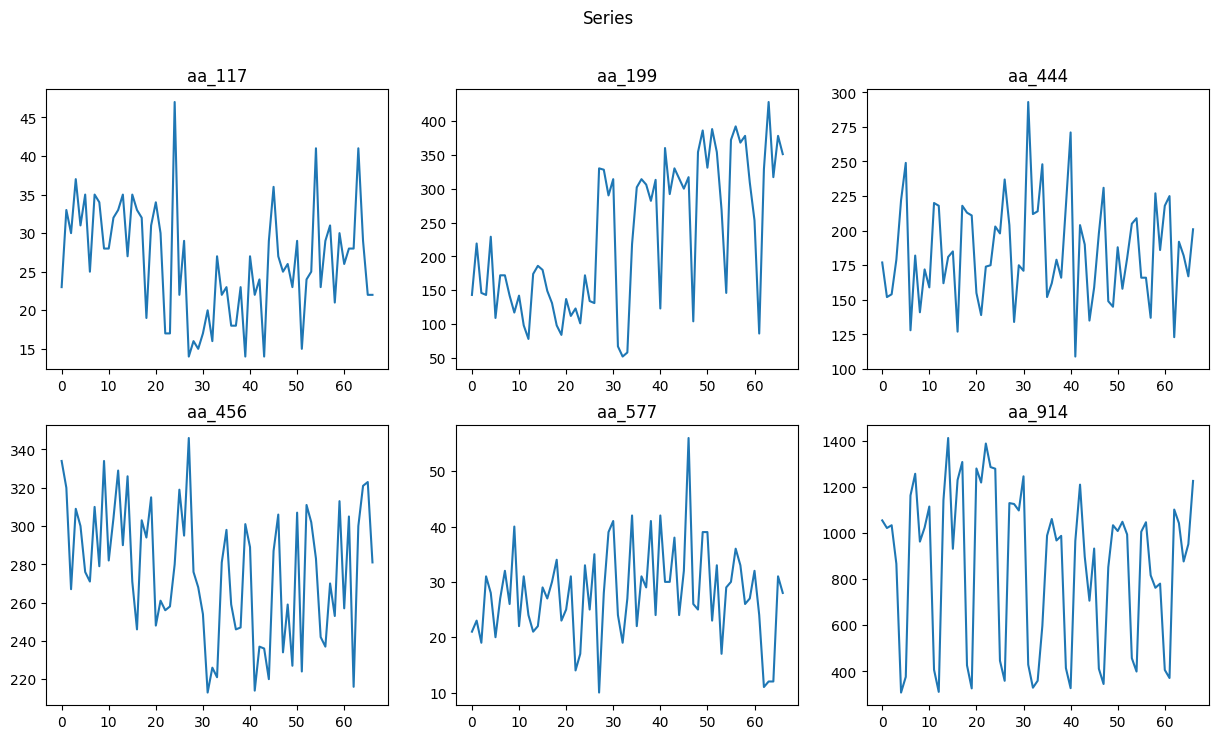

In [134]:
fig, axs = plt.subplots(2,3,figsize=(15,8))
fig.suptitle('Series')
for i in range(2):
    for j in range(3):
        if i*3+j+1>len(mySeries): # pass the others that we can't fill
            continue
        axs[i, j].plot(mySeries[i*3+j].values)
        axs[i, j].set_title(namesofMySeries[i*3+j])
plt.show()

It seems like there are pretty much similar time series such as ```aa_117``` and ```aa_456```

Có vẻ như có khá nhiều chuỗi thời gian tương tự nhau như ```aa_117``` và ```aa_456```

## 2. 2. Preprocessing

Before we start analyzing let's check if our data is uniform in length.
Trước khi bắt đầu phân tích, hãy kiểm tra xem dữ liệu của chúng ta có độ dài đồng đều hay không.

In [135]:
series_lengths = {len(series) for series in mySeries}
print(series_lengths)

{67}


As we guessed, it is not uniform in length. So in this case, we should find which series contain missing data and fill them. Because, otherwise our indices will be shifted and i.th index -let's say it is 10th of May- of the x series won't be same as i.th index of the y series -let's say i.th index of the y series may be 11th of May-.

Như chúng ta đã đoán, nó không đồng đều về độ dài. Vì vậy, trong trường hợp này, chúng ta nên tìm chuỗi nào chứa dữ liệu bị thiếu và điền vào. Bởi vì, nếu không, các chỉ số của chúng ta sẽ bị dịch chuyển và chỉ số thứ i - giả sử là ngày 10 tháng 5 - của chuỗi x sẽ không giống với chỉ số thứ i của chuỗi y - giả sử là chỉ số thứ i của chuỗi y có thể là ngày 11 tháng 5 -.

In [136]:
ind = 0
for series in mySeries:
    print("["+str(ind)+"] "+series.index[0]+" "+series.index[len(series)-1])
    ind+=1

[0] 2023-08-01 2023-10-06
[1] 2023-08-01 2023-10-06
[2] 2023-08-01 2023-10-06
[3] 2023-08-01 2023-10-06
[4] 2023-08-01 2023-10-06
[5] 2023-08-01 2023-10-06


As you can see 6th, 11th and 12th series are not starting from the same date as others. To solve this problem, we should first find the longest series of the series and elongate others according to that. Usually, to do this we should check the oldest and newest date and elongate all series according to these dates. But in our case, nearly every series starts from 1992-01-01 and ends in 2019-09-01. Thus, finding the longest series will be enough for us.

Như bạn thấy, chuỗi thứ 6, 11 và 12 không bắt đầu từ cùng một ngày với những chuỗi khác. Để giải quyết vấn đề này, trước tiên chúng ta phải tìm chuỗi dài nhất của chuỗi và kéo dài các chuỗi khác theo chuỗi đó. Thông thường, để làm điều này, chúng ta phải kiểm tra ngày cũ nhất và mới nhất và kéo dài tất cả các chuỗi theo những ngày này. Nhưng trong trường hợp của chúng ta, hầu như mọi chuỗi đều bắt đầu từ 1992-01-01 và kết thúc vào 2019-09-01. Do đó, việc tìm chuỗi dài nhất sẽ là đủ đối với chúng ta.

In [137]:
max_len = max(series_lengths)
longest_series = None
for series in mySeries:
    if len(series) == max_len:
        longest_series = series

In this code block, I reindexed the series that are not as long as the longest one and fill the empty dates with ```np.nan```.

Trong khối mã này, tôi lập chỉ mục lại các chuỗi không dài bằng chuỗi dài nhất và điền ngày trống bằng ```np.nan```.

In [138]:
problems_index = []

for i in range(len(mySeries)):
    if len(mySeries[i])!= max_len:
        problems_index.append(i)
        mySeries[i] = mySeries[i].reindex(longest_series.index)

We can check how many series are polluted with nan values with this function.

Chúng ta có thể kiểm tra có bao nhiêu chuỗi bị ô nhiễm bởi giá trị nan bằng hàm này.

In [139]:
def nan_counter(list_of_series):
    nan_polluted_series_counter = 0
    for series in list_of_series:
        if series.isnull().sum().sum() > 0:
            nan_polluted_series_counter+=1
    print(nan_polluted_series_counter)

We have 3 series that are polluted with nan and we used to have 3 series that are shorter than others, so math checks out.

Chúng ta có 3 loạt bị ô nhiễm bởi nan và trước đây chúng ta có 3 loạt ngắn hơn những loạt khác, vì vậy phép toán sẽ đúng.

In [140]:
nan_counter(mySeries)

0


Because these series lack only one point, I used linear interpolation to fill the gap but for series that have more missing value, you can use much more complex interpolation methods such as quadratic, cubic, spline, barycentric, etc.

Vì các chuỗi này chỉ thiếu một điểm nên tôi đã sử dụng phép nội suy tuyến tính để lấp đầy khoảng trống nhưng đối với các chuỗi có nhiều giá trị bị thiếu hơn, bạn có thể sử dụng các phương pháp nội suy phức tạp hơn nhiều như bậc hai, bậc ba, spline, barycentric, v.v.

In [141]:
for i in problems_index:
    mySeries[i].interpolate(limit_direction="both",inplace=True)

As we can see, now all of our series are the same length and don't contain any missing value.

Như chúng ta có thể thấy, bây giờ tất cả các chuỗi của chúng ta đều có cùng độ dài và không chứa bất kỳ giá trị nào bị thiếu.

In [142]:
nan_counter(mySeries)

0


After handling missing values, the other issue is the scale of the series. Without, normalizing data the series that looks like each other will be seen so different from each other and will affect the accuracy of the clustering process. We can see the effect of the normalizing in the following images.

Sau khi xử lý các giá trị bị thiếu, vấn đề khác là quy mô của chuỗi. Nếu không chuẩn hóa dữ liệu, các chuỗi trông giống nhau sẽ được nhìn thấy rất khác nhau và sẽ ảnh hưởng đến độ chính xác của quá trình phân cụm. Chúng ta có thể thấy hiệu ứng của việc chuẩn hóa trong các hình ảnh sau.

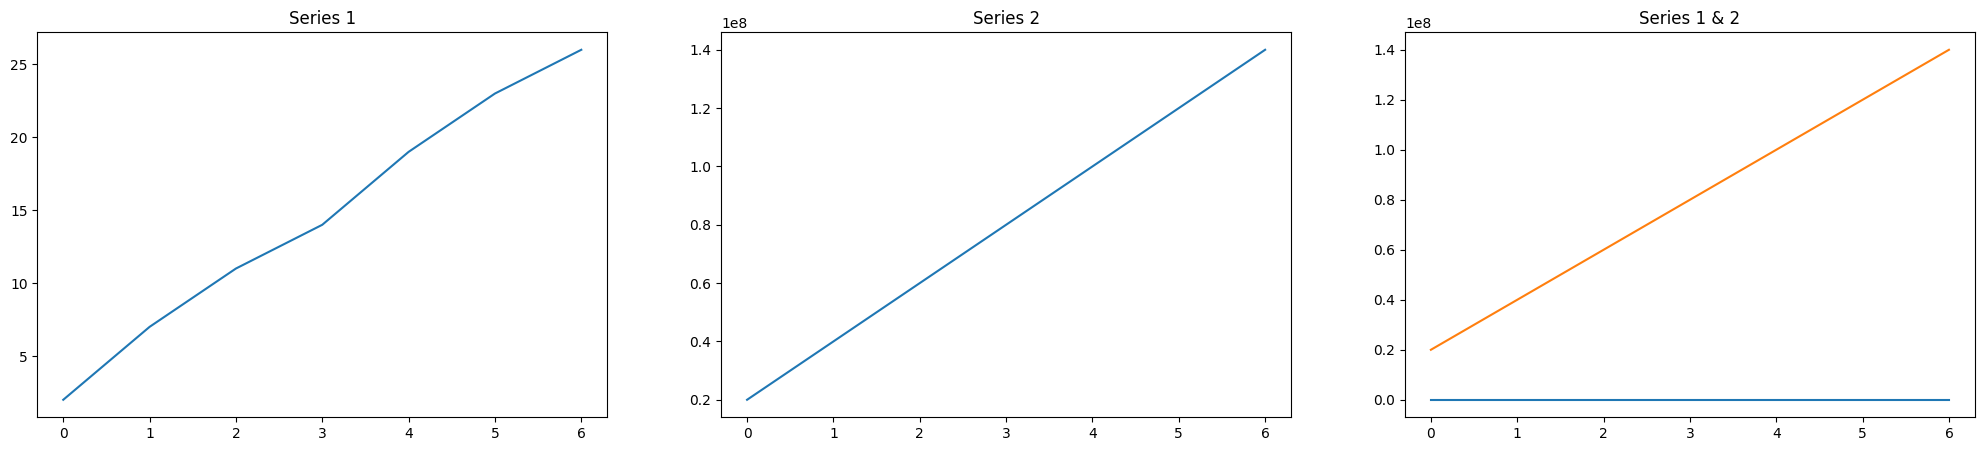

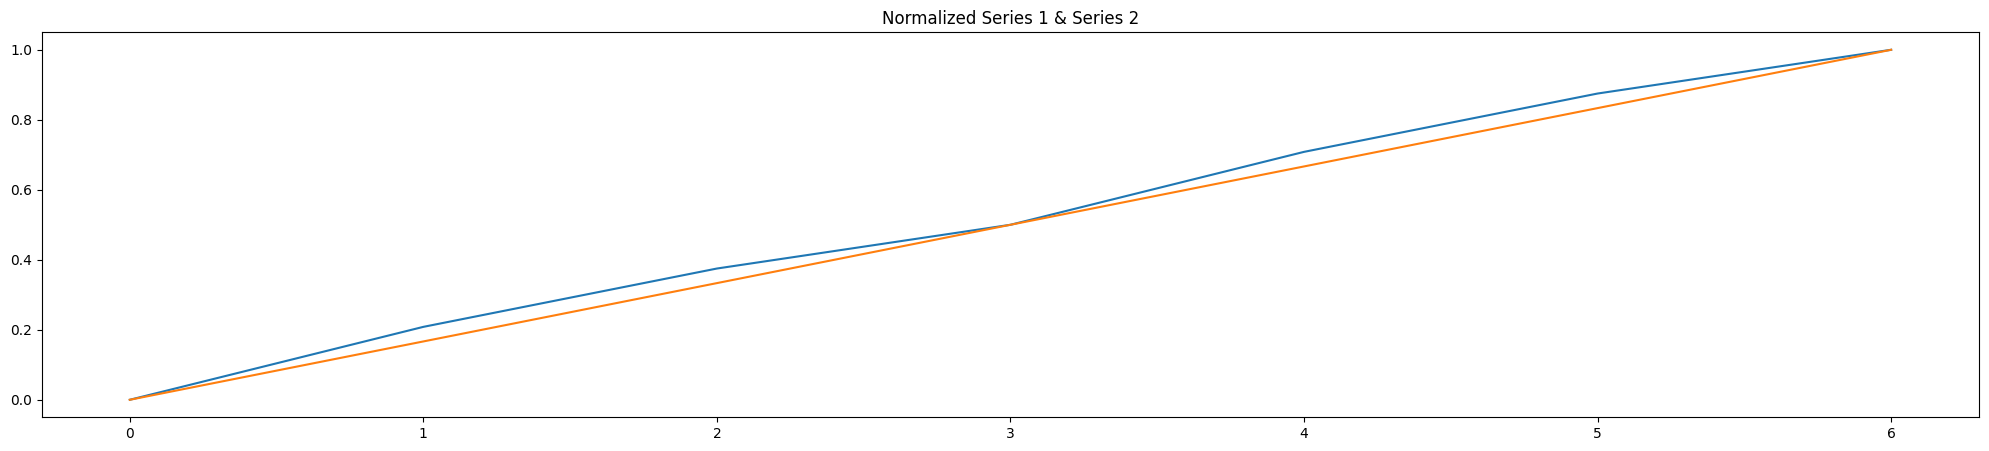

In [143]:
a = [[2],[7],[11],[14],[19],[23],[26]]
b = [[20000000],[40000000],[60000000],[80000000],[100000000],[120000000],[140000000]]
fig, axs = plt.subplots(1,3,figsize=(25,5))
axs[0].plot(a)
axs[0].set_title("Series 1")
axs[1].plot(b)
axs[1].set_title("Series 2")
axs[2].plot(a)
axs[2].plot(b)
axs[2].set_title("Series 1 & 2")
plt.figure(figsize=(25,5))
plt.plot(MinMaxScaler().fit_transform(a))
plt.plot(MinMaxScaler().fit_transform(b))
plt.title("Normalized Series 1 & Series 2")
plt.show()

Note that we normalized each time series by their own values, not the values of other time series.

Lưu ý rằng chúng tôi đã chuẩn hóa từng chuỗi thời gian theo giá trị riêng của chuỗi thời gian đó, chứ không phải theo giá trị của các chuỗi thời gian khác.

In [144]:
for i in range(len(mySeries)):
    scaler = MinMaxScaler()
    mySeries[i] = MinMaxScaler().fit_transform(mySeries[i])
    mySeries[i]= mySeries[i].reshape(len(mySeries[i]))

The result of the normalizing process seems fine.
Kết quả của quá trình chuẩn hóa có vẻ ổn.

In [145]:
print("max: "+str(max(mySeries[0]))+"\tmin: "+str(min(mySeries[0])))
print(mySeries[0][:5])

max: 1.0	min: 0.0
[0.27272727 0.57575758 0.48484848 0.6969697  0.51515152]


## 2. 3. Clustering

I will be using 2 different methods for clustering these series. The first of the methods is Self Organizing Maps(SOM) and the other method is K-Means.

Tôi sẽ sử dụng 2 phương pháp khác nhau để nhóm các chuỗi này. Phương pháp đầu tiên là Bản đồ tự tổ chức (SOM) và phương pháp còn lại là K-Means.

### 2. 3. 1. SOM
 
Self-organizing maps are a type of neural network that is trained using unsupervised learning to produce a low-dimensional representation of the input space of the training samples, called a map.

Bản đồ tự tổ chức là một loại mạng nơ-ron được đào tạo bằng phương pháp học không giám sát để tạo ra biểu diễn có chiều thấp của không gian đầu vào của các mẫu đào tạo, được gọi là bản đồ.

![SOM](https://raw.githubusercontent.com/izzettunc/Kohonen-SOM/master/data/screenshots/landing.png)
<center>Source : Github Repo: <a href="https://raw.githubusercontent.com/izzettunc/Kohonen-SOM/master/data/screenshots/landing.png">landing.png</a></center>
<br>    
Also, self-organizing maps  differ from other artificial neural networks as they apply competitive(or cooperative) learning as opposed to error-correction learning (such as backpropagation with gradient descent), and in the sense that they use a neighborhood function to preserve the topological properties of the input space.

Ngoài ra, các bản đồ tự tổ chức khác với các mạng nơ-ron nhân tạo khác vì chúng áp dụng phương pháp học cạnh tranh (hoặc hợp tác) trái ngược với phương pháp học sửa lỗi (như truyền ngược với giảm dần độ dốc) và theo nghĩa là chúng sử dụng hàm lân cận để bảo toàn các thuộc tính tôpô của không gian đầu vào.

![Learning process of som](https://upload.wikimedia.org/wikipedia/commons/3/35/TrainSOM.gif)
<center>Source : Wiki Commons: <a href="https://upload.wikimedia.org/wikipedia/commons/3/35/TrainSOM.gif">TrainSOM.gif</a></center>
<br>
Because of the ability to produce a map, som deemed as a method to do dimensionality reduction. But in our case, when each node of the som is accepted as medoids of the cluster, we can use it for clustering. To do so, we should remove our time indices from our time series, and instead of measured values of each date, we should accept them as different features and dimensions of a single data point.

Do khả năng tạo bản đồ, một số được coi là phương pháp để giảm chiều. Nhưng trong trường hợp của chúng ta, khi mỗi nút của một số được chấp nhận là medoid của cụm, chúng ta có thể sử dụng nó để phân cụm. Để làm như vậy, chúng ta nên xóa các chỉ số thời gian khỏi chuỗi thời gian của mình và thay vì các giá trị đo được của mỗi ngày, chúng ta nên chấp nhận chúng như các tính năng và chiều khác nhau của một điểm dữ liệu duy nhất.

For more info about some, you can check [this medium post](https://medium.com/@abhinavr8/self-organizing-maps-ff5853a118d4).

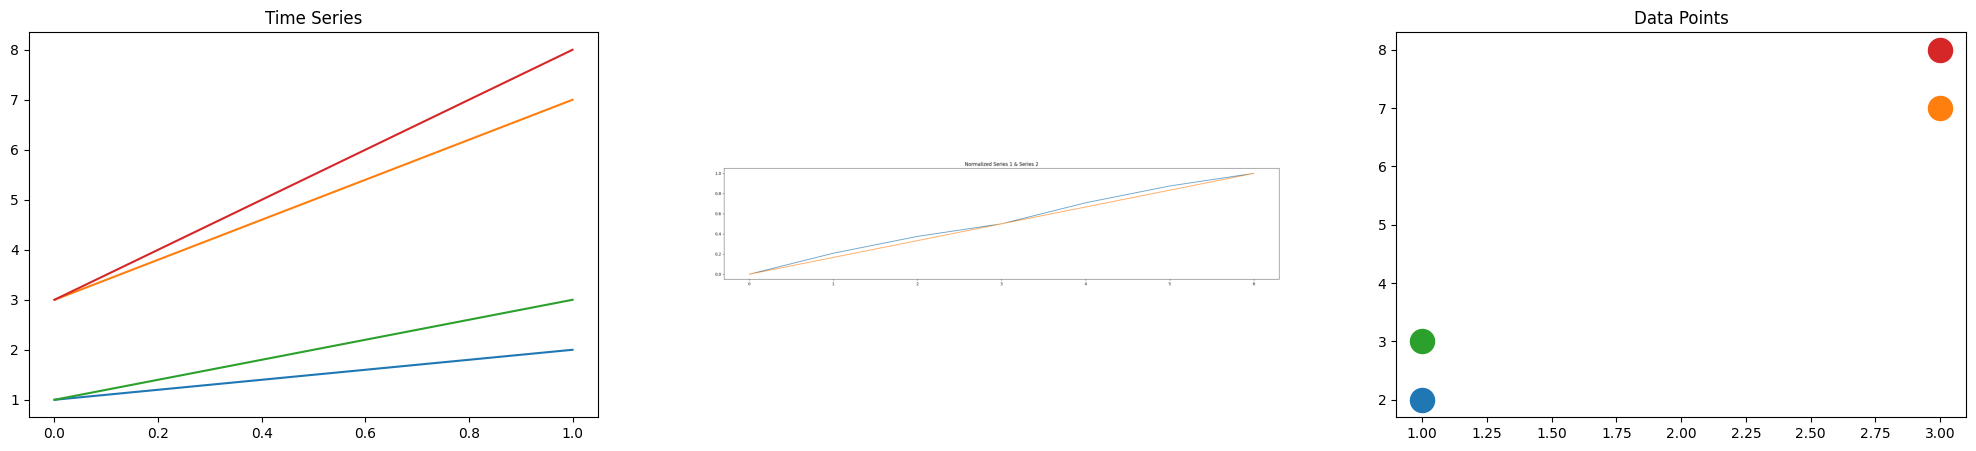

In [146]:
a = [1,2]
b = [3,7]
c = [1,3]
d = [3,8]
img = plt.imread("D:\\Do_an_2\\Project_2\\output.png")
fig, axs = plt.subplots(1,3,figsize=(25,5))
axs[0].plot(a)
axs[0].plot(b)
axs[0].plot(c)
axs[0].plot(d)
axs[0].set_title("Time Series")
axs[1].imshow(img)
axs[1].axis("off")
axs[2].set_title("Data Points")
axs[2].scatter(a[0],a[1], s=300)
axs[2].scatter(b[0],b[1], s=300)
axs[2].scatter(c[0],c[1], s=300)
axs[2].scatter(d[0],d[1], s=300)
plt.show()

For the implementation of the som algorithm I used [miniSom](https://github.com/JustGlowing/minisom) and set my parameters as follows:

Để triển khai thuật toán som, tôi đã sử dụng [miniSom](https://github.com/JustGlowing/minisom) và đặt các tham số như sau:

- sigma: 0.3
- learning_rate: 0.5
- random weight initialization
- 50.000 iteration
- Map size: square root of the number of series

As a side note, I didn't optimize these parameters due to the simplicity of the dataset.

Lưu ý, tôi đã không tối ưu hóa các tham số này do tính đơn giản của tập dữ liệu.

In [147]:
som_x = som_y = math.ceil(math.sqrt(math.sqrt(len(mySeries))))
# I didn't see its significance but to make the map square,
# I calculated square root of map size which is 
# the square root of the number of series
# for the row and column counts of som

som = MiniSom(som_x, som_y,len(mySeries[0]), sigma=0.3, learning_rate = 0.1)

som.random_weights_init(mySeries)
som.train(mySeries, 50000)


#### 2. 3. 1. 1. Results

After the training, I plotted the results. For each cluster, I plotted every series, a little bit transparent and in gray, and in order to see the movement or the shape of the cluster, I took the average of the cluster and plotted that averaged series in red .

Sau khi đào tạo, tôi đã vẽ biểu đồ kết quả. Đối với mỗi cụm, tôi đã vẽ biểu đồ từng chuỗi, hơi trong suốt và có màu xám, và để thấy chuyển động hoặc hình dạng của cụm, tôi đã lấy giá trị trung bình của cụm và vẽ biểu đồ chuỗi trung bình đó bằng màu đỏ.

In [148]:
# Little handy function to plot series
def plot_som_series_averaged_center(som_x, som_y, win_map):
    fig, axs = plt.subplots(som_x,som_y,figsize=(15,8))
    fig.suptitle('Clusters')
    for x in range(som_x):
        for y in range(som_y):
            cluster = (x,y)
            if cluster in win_map.keys():
                for series in win_map[cluster]:
                    axs[cluster].plot(series,c="gray",alpha=0.5) 
                axs[cluster].plot(np.average(np.vstack(win_map[cluster]),axis=0),c="red")
            cluster_number = x*som_y+y+1
            axs[cluster].set_title(f"Cluster {cluster_number}")

    plt.show()

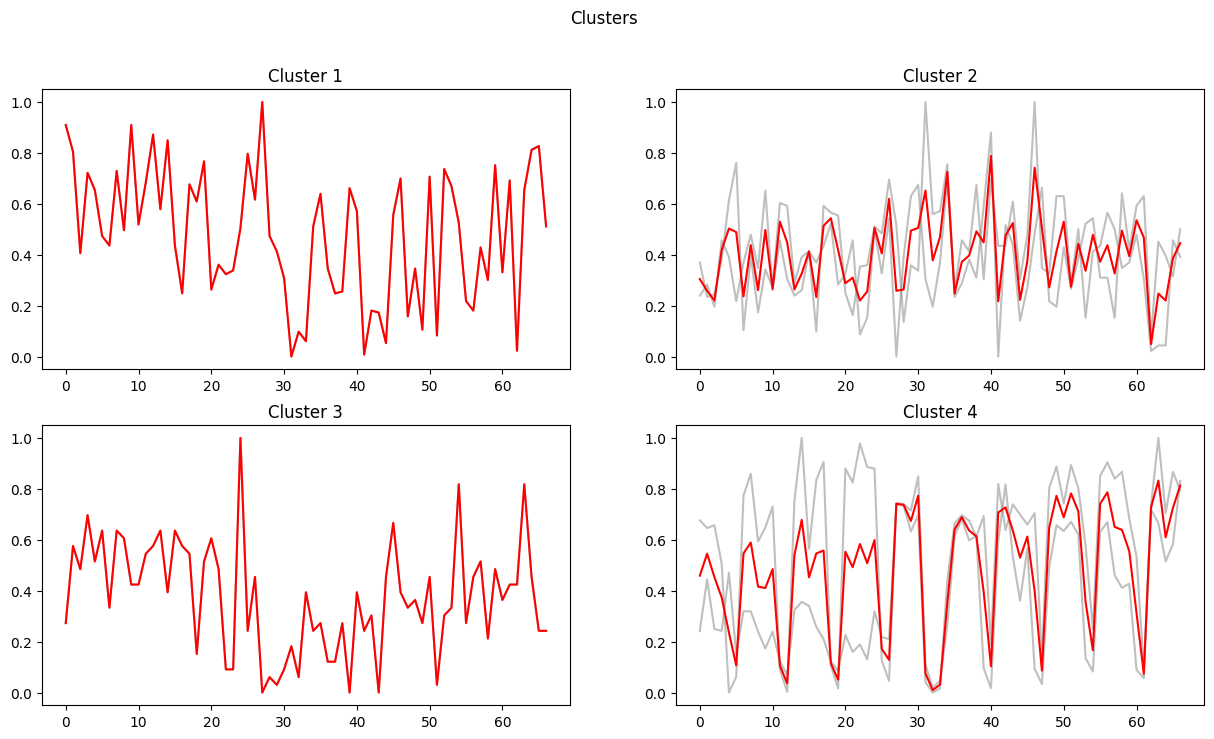

In [149]:
win_map = som.win_map(mySeries)
# Returns the mapping of the winner nodes and inputs

plot_som_series_averaged_center(som_x, som_y, win_map)

As you can see from the plot below, SOM perfectly clustered the 6 different series into 3 clusters.

Như bạn có thể thấy từ sơ đồ bên dưới, SOM đã nhóm 6 chuỗi khác nhau thành 3 cụm một cách hoàn hảo.

Another method to extract the movement/shape of the cluster is instead of averaging each series in the cluster, using Dynamic Time Warping Barycenter Averaging ([DBA](https://github.com/fpetitjean/DBA)).

Một phương pháp khác để trích xuất chuyển động/hình dạng của cụm là sử dụng Dynamic Time Warping Barycenter Averaging ([DBA](https://github.com/fpetitjean/DBA)) thay vì tính trung bình từng chuỗi trong cụm.

DBA is another type of averaging method that used the Dynamic Time Warping method in it and might be very useful to extract the movement/shape of the cluster as seen in the following images.

DBA là một loại phương pháp tính trung bình khác sử dụng phương pháp Dynamic Time Warping và có thể rất hữu ích để trích xuất chuyển động/hình dạng của cụm như trong các hình ảnh sau.

![Arithmetic Averaging](https://raw.githubusercontent.com/fpetitjean/DBA/master/images/arithmetic.png)
![DBA](https://raw.githubusercontent.com/fpetitjean/DBA/master/images/DBA.png)


To do so, I used ```dtw_barycenter_averaging``` method in the [tslearn](https://github.com/tslearn-team/tslearn) library and changed the ```np.average``` with it.

Để thực hiện như vậy, tôi đã sử dụng phương  ```dtw_barycenter_averaging``` trong thư viện [tslearn](https://github.com/tslearn-team/tslearn) và thay đổi ```np.average``` bằng phương thức đó.

In [150]:
def plot_som_series_dba_center(som_x, som_y, win_map):
    fig, axs = plt.subplots(som_x,som_y,figsize=(15,8))
    fig.suptitle('Clusters')
    for x in range(som_x):
        for y in range(som_y):
            cluster = (x,y)
            if cluster in win_map.keys():
                for series in win_map[cluster]:
                    axs[cluster].plot(series,c="gray",alpha=0.5) 
                axs[cluster].plot(dtw_barycenter_averaging(np.vstack(win_map[cluster])),c="red") # I changed this part
            cluster_number = x*som_y+y+1
            axs[cluster].set_title(f"Cluster {cluster_number}")

    plt.show()

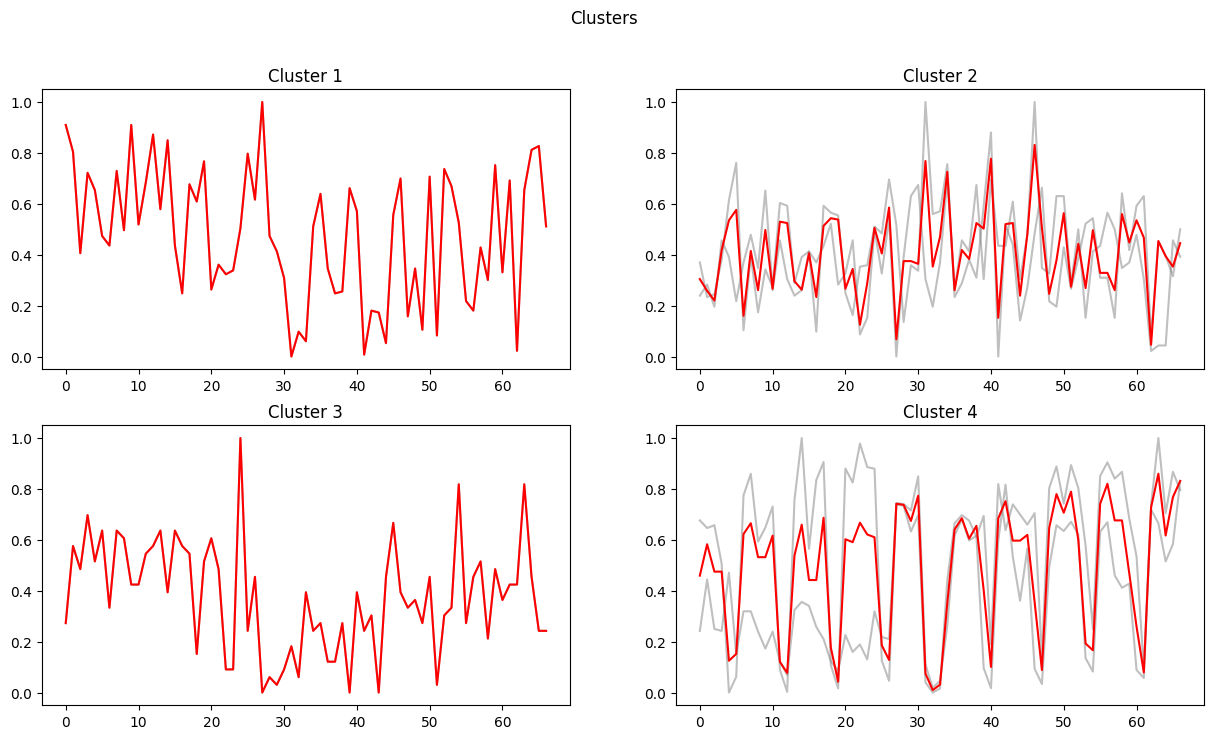

In [151]:
win_map = som.win_map(mySeries)

plot_som_series_dba_center(som_x, som_y, win_map)

We can't see much difference from this result but, I highly recommend that to use this method for this purpose. But, also, note that the operation of dba is not a light one. So, if you seek speed, this method might not be for you.

Chúng ta không thấy nhiều sự khác biệt từ kết quả này nhưng tôi thực sự khuyên bạn nên sử dụng phương pháp này cho mục đích này. Nhưng cũng lưu ý rằng hoạt động của dba không hề nhẹ nhàng. Vì vậy, nếu bạn muốn nhanh thì phương pháp này có thể không dành cho bạn.

#### 2. 3. 1. 2. Cluster Distribution
We can see the distribution of the time series in clusters in the following chart.

Chúng ta có thể thấy sự phân bố của chuỗi thời gian theo cụm trong biểu đồ sau.

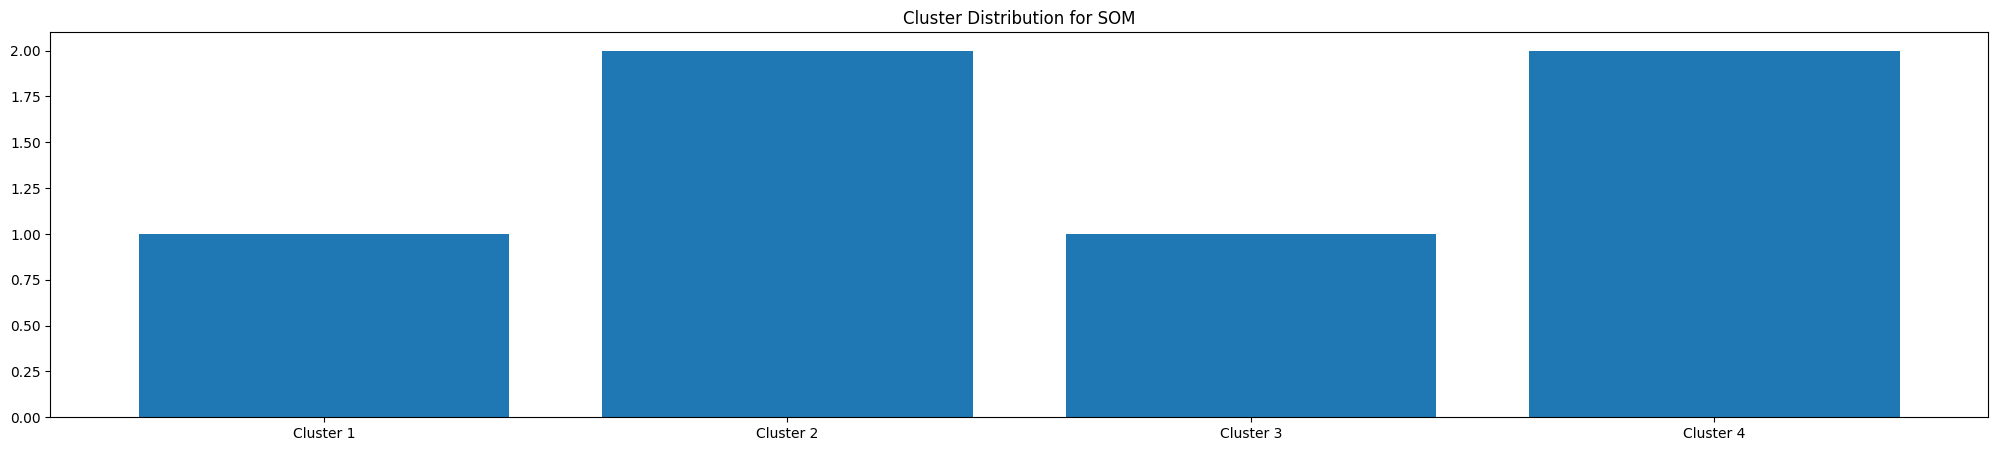

In [152]:
cluster_c = []
cluster_n = []
for x in range(som_x):
    for y in range(som_y):
        cluster = (x,y)
        if cluster in win_map.keys():
            cluster_c.append(len(win_map[cluster]))
        else:
            cluster_c.append(0)
        cluster_number = x*som_y+y+1
        cluster_n.append(f"Cluster {cluster_number}")

plt.figure(figsize=(25,5))
plt.title("Cluster Distribution for SOM")
plt.bar(cluster_n,cluster_c)
plt.show()

#### 2. 3. 1. 3. Cluster Mapping

<p style="color:gray">(Thank you for this wonderful question <a href="https://www.kaggle.com/stephentseng">Stephen Tseng</a>)</p>
Well, we did cluster our series but how de we know which series belonging to which cluster? Ain't that the whole purpose of clustering? <br><br>

Vâng, chúng tôi đã nhóm các chuỗi của mình nhưng làm sao chúng tôi biết được chuỗi nào thuộc về cụm nào? Đó không phải là toàn bộ mục đích của việc nhóm sao? <br><br>

As we can see in [these illustrations](#2.-3.-1.-SOM) each node (or multiple of nodes in some cases) represents a cluster. Therefore we can find out which series is belonging to which cluster by checking the winner node of each series. 

Như chúng ta có thể thấy trong [các hình minh họa này] (#2.-3.-1.-SOM), mỗi nút (hoặc bội số của các nút trong một số trường hợp) biểu diễn một cụm. Do đó, chúng ta có thể tìm ra chuỗi nào thuộc về cụm nào bằng cách kiểm tra nút chiến thắng của mỗi chuỗi.

In [153]:
# Let's check first 5
for series in mySeries[:5]:
    print(som.winner(series))

(1, 0)
(1, 1)
(0, 1)
(0, 0)
(0, 1)


In order to make this piece of information more appealing to eye, we can map each node to a number <br>

Để làm cho thông tin này hấp dẫn hơn đối với mắt, chúng ta có thể ánh xạ mỗi nút thành một số <br>

```e.g. for n*m grid (0,0)=1, (0,1)=2, ... (0,m)=m+1, (1,0)=(m+1)+1, (1,1)=(m+1)+2, ... , (n,m)=(n+1)*(m+1) ``` 

and print the name of the series with the cluster number.

và in tên của chuỗi cùng với số cụm.

In [154]:
cluster_map = []
for idx in range(len(mySeries)):
    winner_node = som.winner(mySeries[idx])
    cluster_map.append((namesofMySeries[idx],f"Cluster {winner_node[0]*som_y+winner_node[1]+1}"))

pd.DataFrame(cluster_map,columns=["Series","Cluster"]).sort_values(by="Cluster").set_index("Series")

,Cluster
Series,
aa_456,Cluster 1
aa_444,Cluster 2
aa_577,Cluster 2
aa_117,Cluster 3
aa_199,Cluster 4
aa_914,Cluster 4


### 2. 3. 2. K-Means

K-means clustering is a method that aims to cluster n input to k clusters in which each data point belongs to cluster with the nearest mean (cluster centroid). It can be visualized as Voronoi cells and it is one of the most popular clustering algorithms and the most basic one. For more info about k-means, you can check [this medium post](https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a).

Phân cụm K-means là một phương pháp nhằm mục đích phân cụm n đầu vào thành k cụm trong đó mỗi điểm dữ liệu thuộc về cụm có giá trị trung bình gần nhất (trung tâm cụm). Nó có thể được hình dung như các ô Voronoi và là một trong những thuật toán phân cụm phổ biến nhất và cơ bản nhất. Để biết thêm thông tin về k-means, bạn có thể kiểm tra

![Training process](https://i.imgur.com/k4XcapI.gif)

In order to cluster our series with k-means, the essential thing to do is, as we do it with som, removing our time indices from our time series, and instead of measured values of each date, we should accept them as different features and dimensions of a single data point. Another important thing to do is, selecting the distance metric. In the k-means algorithm, people usually use the euclidean distance but as we've seen in [DBA](https://github.com/fpetitjean/DBA), it is not effective in our case. So, we will be using Dynamic Time Warping (DTW) instead of euclidean distance and you can see why we are doing this in the following images.

Để nhóm các chuỗi của chúng ta với k-means, điều cần thiết phải làm là, như chúng ta làm với som, loại bỏ các chỉ số thời gian của chúng ta khỏi chuỗi thời gian của chúng ta và thay vì các giá trị đo được của mỗi ngày, chúng ta nên chấp nhận chúng như các tính năng và chiều khác nhau của một điểm dữ liệu duy nhất. Một điều quan trọng khác cần làm là chọn số liệu khoảng cách. Trong thuật toán k-means, mọi người thường sử dụng khoảng cách Euclid nhưng như chúng ta đã thấy trong [DBA](https://github.com/fpetitjean/DBA), nó không hiệu quả trong trường hợp của chúng ta. Vì vậy, chúng ta sẽ sử dụng Dynamic Time Warping (DTW) thay vì khoảng cách Euclid và bạn có thể thấy lý do tại sao chúng ta làm điều này trong các hình ảnh sau.

![Difference of dtw and euclidean distance](https://upload.wikimedia.org/wikipedia/commons/6/69/Euclidean_vs_DTW.jpg)

In [155]:
cluster_count = math.ceil(math.sqrt(len(mySeries))) 
# A good rule of thumb is choosing k as the square root of the number of points in the training data set in kNN

km = TimeSeriesKMeans(n_clusters=cluster_count, metric="dtw")

labels = km.fit_predict(mySeries)

#### 2. 3. 2. 1. Results

After the training, I plotted the results as I did with the som. For each cluster, I plotted every series, a little bit transparent and in gray, and in order to see the movement or the shape of the cluster, I took the average of the cluster and plotted that averaged series in red.

Sau khi đào tạo, tôi đã vẽ biểu đồ kết quả như tôi đã làm với som. Đối với mỗi cụm, tôi đã vẽ biểu đồ cho từng chuỗi, hơi trong suốt và có màu xám, và để thấy chuyển động hoặc hình dạng của cụm, tôi đã lấy giá trị trung bình của cụm và vẽ biểu đồ chuỗi trung bình đó bằng màu đỏ.

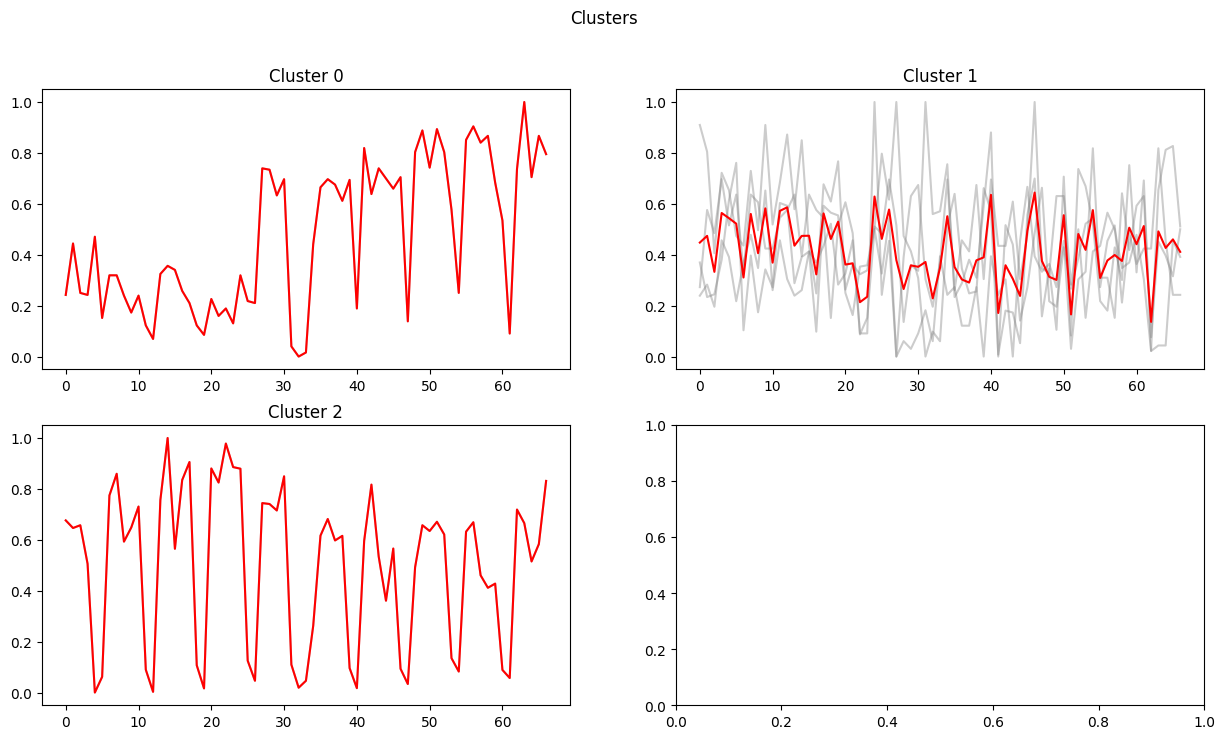

In [156]:
plot_count = math.ceil(math.sqrt(cluster_count))

fig, axs = plt.subplots(plot_count,plot_count,figsize=(15,8))
fig.suptitle('Clusters')
row_i=0
column_j=0
# For each label there is,
# plots every series with that label
for label in set(labels):
    cluster = []
    for i in range(len(labels)):
            if(labels[i]==label):
                axs[row_i, column_j].plot(mySeries[i],c="gray",alpha=0.4)
                cluster.append(mySeries[i])
    if len(cluster) > 0:
        axs[row_i, column_j].plot(np.average(np.vstack(cluster),axis=0),c="red")
    axs[row_i, column_j].set_title("Cluster "+str(row_i*som_y+column_j))
    column_j+=1
    if column_j%plot_count == 0:
        row_i+=1
        column_j=0
        
plt.show()

As you can see from the plot below, k-means clustered the 23 different series into 5 clusters. 2 of the clusters contains only 1 time series which may be deemed as an outlier.

Như bạn có thể thấy từ biểu đồ bên dưới, k-means đã nhóm 23 chuỗi khác nhau thành 5 cụm. 2 trong số các cụm chỉ chứa 1 chuỗi thời gian có thể được coi là giá trị ngoại lai.

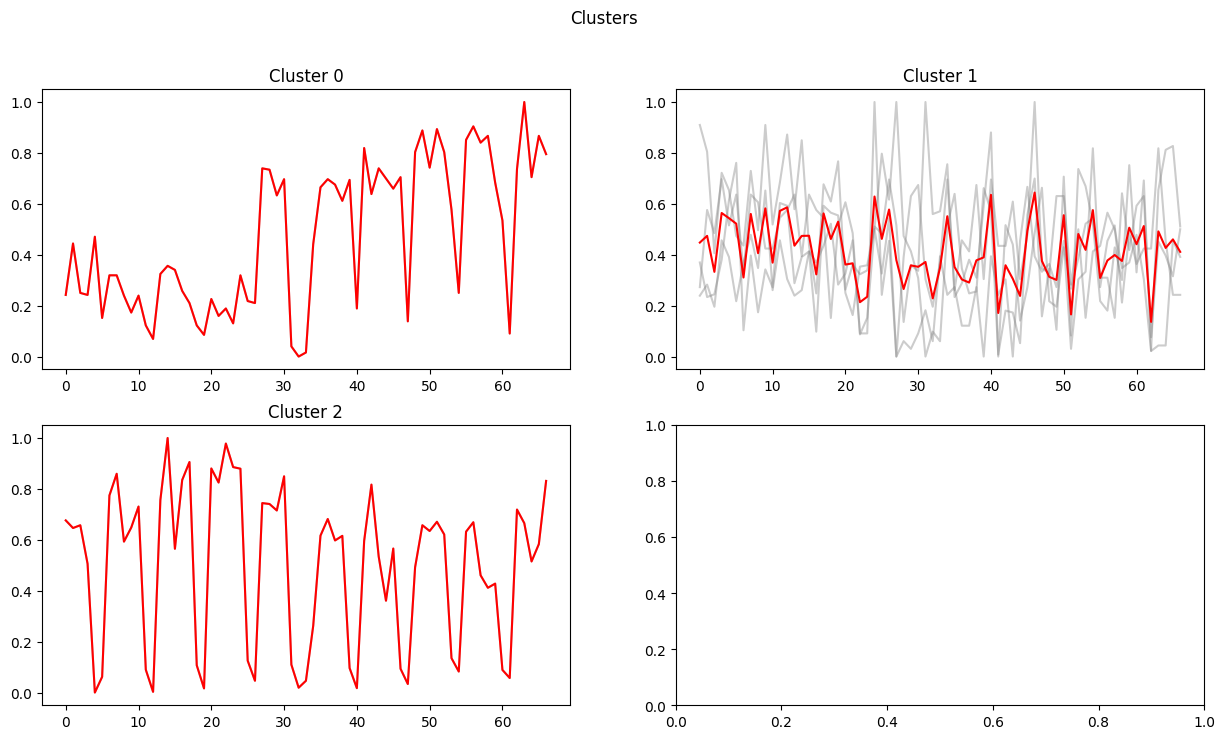

In [157]:
plot_count = math.ceil(math.sqrt(cluster_count))

fig, axs = plt.subplots(plot_count,plot_count,figsize=(15,8))
fig.suptitle('Clusters')
row_i=0
column_j=0
# For each label there is,
# plots every series with that label
for label in set(labels):
    cluster = []
    for i in range(len(labels)):
            if(labels[i]==label):
                axs[row_i, column_j].plot(mySeries[i],c="gray",alpha=0.4)
                cluster.append(mySeries[i])
    if len(cluster) > 0:
        axs[row_i, column_j].plot(np.average(np.vstack(cluster),axis=0),c="red")
    axs[row_i, column_j].set_title("Cluster "+str(row_i*som_y+column_j))
    column_j+=1
    if column_j%plot_count == 0:
        row_i+=1
        column_j=0
        
plt.show()

As I did before, I used [DBA](https://github.com/fpetitjean/DBA) to see much more time dilated series.

Như tôi đã làm trước đây, tôi đã sử dụng [DBA](https://github.com/fpetitjean/DBA) để xem nhiều chuỗi thời gian giãn nở hơn.

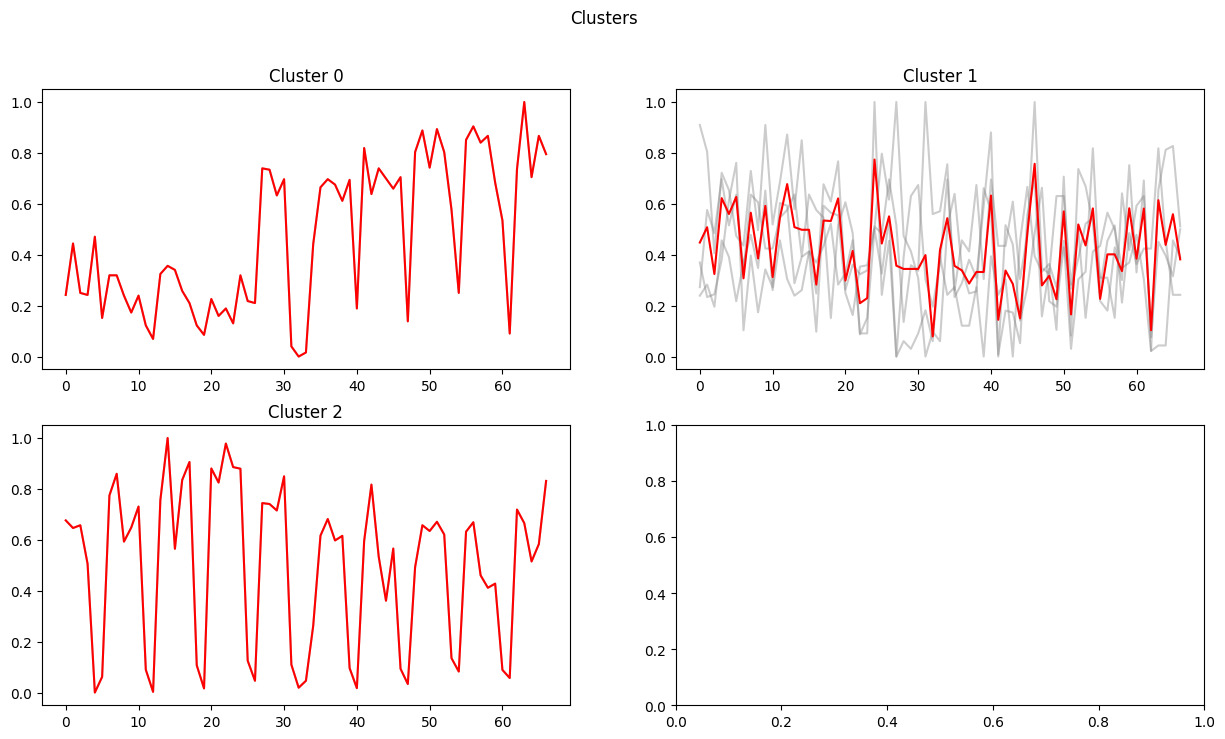

In [158]:
plot_count = math.ceil(math.sqrt(cluster_count))

fig, axs = plt.subplots(plot_count,plot_count,figsize=(15,8))
fig.suptitle('Clusters')
row_i=0
column_j=0
for label in set(labels):
    cluster = []
    for i in range(len(labels)):
            if(labels[i]==label):
                axs[row_i, column_j].plot(mySeries[i],c="gray",alpha=0.4)
                cluster.append(mySeries[i])
    if len(cluster) > 0:
        axs[row_i, column_j].plot(dtw_barycenter_averaging(np.vstack(cluster)),c="red")
    axs[row_i, column_j].set_title("Cluster "+str(row_i*som_y+column_j))
    column_j+=1
    if column_j%plot_count == 0:
        row_i+=1
        column_j=0
        
plt.show()

#### 2. 3. 2. 2. Cluster Distribution

We can see the distribution of the time series in clusters in the following chart. And it seems like k-means clustered 15 of the time series as cluster 1, which is a bit skewed. The reason why this happens is the most probably ```The Curse of Dimentionality``` <p><small><small>You can check it out from the links that I provided at section 5 (See Also)</small></small></p>

Chúng ta có thể thấy sự phân bố của chuỗi thời gian theo cụm trong biểu đồ sau. Và có vẻ như k-means đã nhóm 15 chuỗi thời gian thành cụm 1, hơi lệch một chút. Lý do tại sao điều này xảy ra có lẽ là ```Lời nguyền của chiều không gian``` <p><small><small>Bạn có thể kiểm tra từ các liên kết mà tôi đã cung cấp ở phần 5 (Xem thêm)</small></small></p>

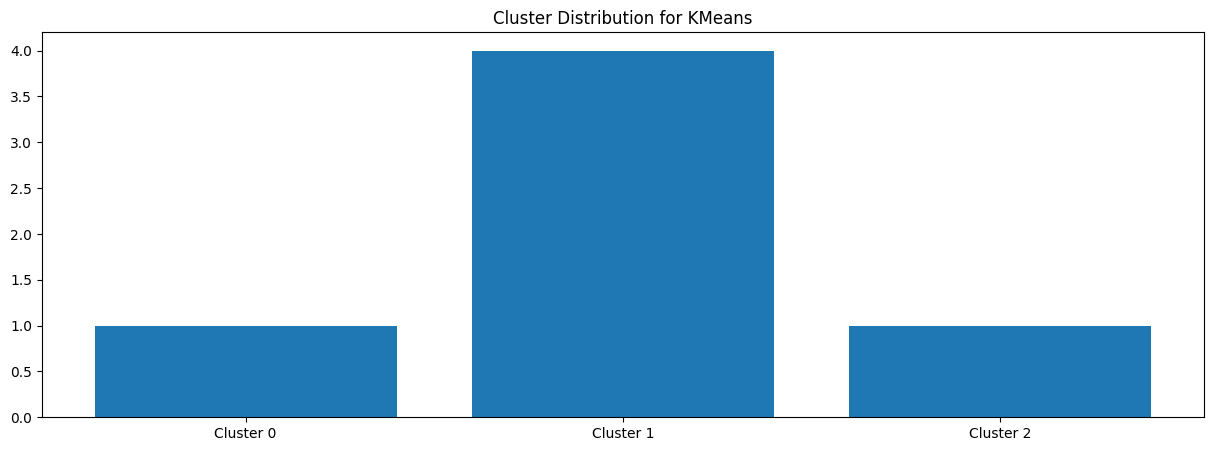

In [159]:
cluster_c = [len(labels[labels==i]) for i in range(cluster_count)]
cluster_n = ["Cluster "+str(i) for i in range(cluster_count)]
plt.figure(figsize=(15,5))
plt.title("Cluster Distribution for KMeans")
plt.bar(cluster_n,cluster_c)
plt.show()

#### 2. 3. 2. 3. Cluster Mapping

As we did before, in this part we will be finding which series belonging to which cluster. Thanks to awesome scikit-learn library we actually already have that information. Order of the labels is the same order with our series.

Như chúng ta đã làm trước đó, trong phần này chúng ta sẽ tìm chuỗi nào thuộc về cụm nào. Nhờ thư viện scikit-learn tuyệt vời, chúng ta thực sự đã có thông tin đó. Thứ tự của các nhãn giống với thứ tự của chuỗi của chúng ta.


In [160]:
labels

array([1, 0, 1, 1, 1, 2], dtype=int64)

In [161]:
fancy_names_for_labels = [f"Cluster {label}" for label in labels]
pd.DataFrame(zip(namesofMySeries,fancy_names_for_labels),columns=["Series","Cluster"]).sort_values(by="Cluster").set_index("Series")

,Cluster
Series,
aa_199,Cluster 0
aa_117,Cluster 1
aa_444,Cluster 1
aa_456,Cluster 1
aa_577,Cluster 1
aa_914,Cluster 2


In [163]:
print(mySeries)

[array([0.27272727, 0.57575758, 0.48484848, 0.6969697 , 0.51515152,
       0.63636364, 0.33333333, 0.63636364, 0.60606061, 0.42424242,
       0.42424242, 0.54545455, 0.57575758, 0.63636364, 0.39393939,
       0.63636364, 0.57575758, 0.54545455, 0.15151515, 0.51515152,
       0.60606061, 0.48484848, 0.09090909, 0.09090909, 1.        ,
       0.24242424, 0.45454545, 0.        , 0.06060606, 0.03030303,
       0.09090909, 0.18181818, 0.06060606, 0.39393939, 0.24242424,
       0.27272727, 0.12121212, 0.12121212, 0.27272727, 0.        ,
       0.39393939, 0.24242424, 0.3030303 , 0.        , 0.45454545,
       0.66666667, 0.39393939, 0.33333333, 0.36363636, 0.27272727,
       0.45454545, 0.03030303, 0.3030303 , 0.33333333, 0.81818182,
       0.27272727, 0.45454545, 0.51515152, 0.21212121, 0.48484848,
       0.36363636, 0.42424242, 0.42424242, 0.81818182, 0.45454545,
       0.24242424, 0.24242424]), array([0.24202128, 0.44414894, 0.25      , 0.24202128, 0.47074468,
       0.15159574, 0.3191489

#### 2. 3. 2. 4. Curse of Dimensionality

Curse of Dimensionality is a term, first invented by Richard E. Bellman when considering problems in dynamic programming. It basically means, when the dimensionality of the data increase so does the distance between data points. Thus, this change in measurement of distance affects the distance-based algorithms badly. To learn for more about it please check section [5. See Also](#5.-See-Also).

To solve this problem there are numerous algorithms that can be helpful such as PCA which is the most prominent of them, t-SNE, UMAP(map of the som), etc.

Curse of Dimensionality là một thuật ngữ, lần đầu tiên được Richard E. Bellman phát minh khi xem xét các vấn đề trong lập trình động. Về cơ bản, nó có nghĩa là khi số chiều của dữ liệu tăng thì khoảng cách giữa các điểm dữ liệu cũng tăng. Do đó, sự thay đổi trong phép đo khoảng cách này ảnh hưởng xấu đến các thuật toán dựa trên khoảng cách. Để tìm hiểu thêm về nó, vui lòng kiểm tra phần [5. Xem thêm](#5.-Xem thêm).

Để giải quyết vấn đề này, có rất nhiều thuật toán có thể hữu ích như PCA là thuật toán nổi bật nhất trong số chúng, t-SNE, UMAP(bản đồ của som), v.v.

In [164]:
print(mySeries)

[array([0.27272727, 0.57575758, 0.48484848, 0.6969697 , 0.51515152,
       0.63636364, 0.33333333, 0.63636364, 0.60606061, 0.42424242,
       0.42424242, 0.54545455, 0.57575758, 0.63636364, 0.39393939,
       0.63636364, 0.57575758, 0.54545455, 0.15151515, 0.51515152,
       0.60606061, 0.48484848, 0.09090909, 0.09090909, 1.        ,
       0.24242424, 0.45454545, 0.        , 0.06060606, 0.03030303,
       0.09090909, 0.18181818, 0.06060606, 0.39393939, 0.24242424,
       0.27272727, 0.12121212, 0.12121212, 0.27272727, 0.        ,
       0.39393939, 0.24242424, 0.3030303 , 0.        , 0.45454545,
       0.66666667, 0.39393939, 0.33333333, 0.36363636, 0.27272727,
       0.45454545, 0.03030303, 0.3030303 , 0.33333333, 0.81818182,
       0.27272727, 0.45454545, 0.51515152, 0.21212121, 0.48484848,
       0.36363636, 0.42424242, 0.42424242, 0.81818182, 0.45454545,
       0.24242424, 0.24242424]), array([0.24202128, 0.44414894, 0.25      , 0.24202128, 0.47074468,
       0.15159574, 0.3191489

In [165]:
pca = PCA(n_components=2)

mySeries_transformed = pca.fit_transform(mySeries)

Now with less dimension than before, we can see how our series distributed in 2 dimensions.

Bây giờ với số chiều ít hơn trước, chúng ta có thể thấy chuỗi phân bố như thế nào trong 2 chiều.

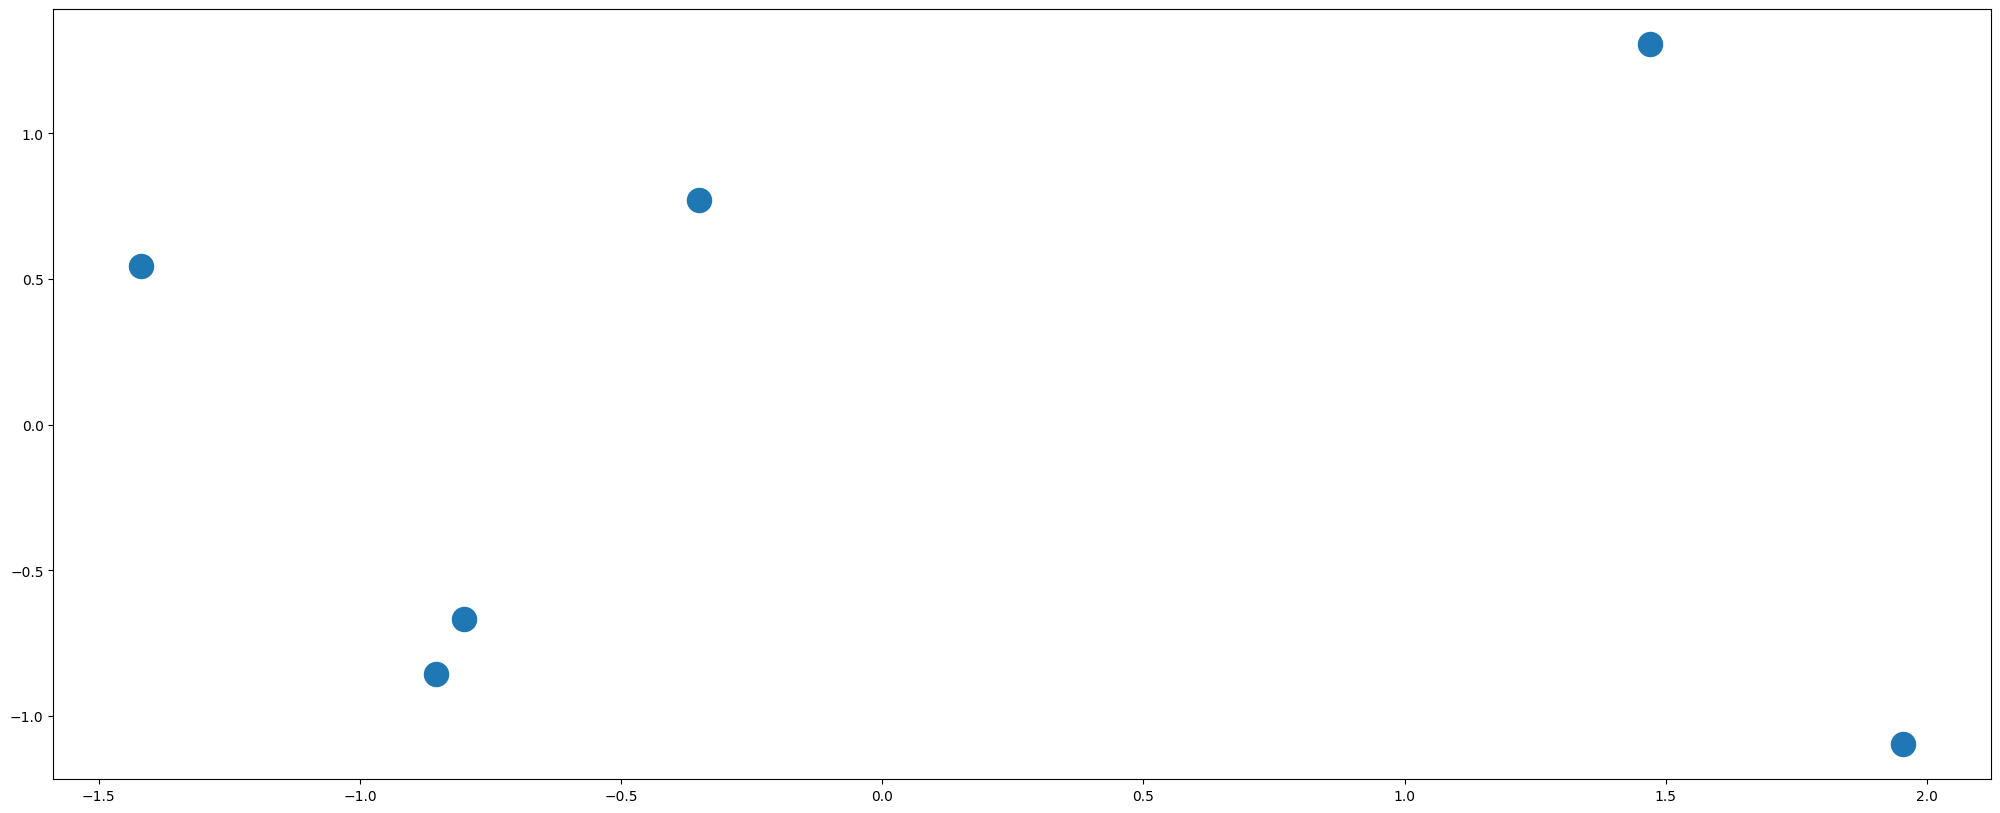

In [83]:
plt.figure(figsize=(25,10))
plt.scatter(mySeries_transformed[:,0],mySeries_transformed[:,1], s=300)
plt.show()

The result of PCA is basically, representation of a 333-dimensional data point as a 2-dimensional data point. As a result of that instead of a time series, we have just 2 value for each series.

Kết quả của PCA về cơ bản là biểu diễn điểm dữ liệu 333 chiều thành điểm dữ liệu 2 chiều. Do đó, thay vì chuỗi thời gian, chúng ta chỉ có 2 giá trị cho mỗi chuỗi.

In [84]:
print(mySeries_transformed[0:5])

[[-0.80040011 -0.66677645]
 [ 1.46973108  1.30597169]
 [-1.41819059  0.54365662]
 [-0.85376532 -0.85706098]
 [-0.35124638  0.77101571]]


Thus, we don't have to use ```dtw``` anymore and instead of ```TimeSeriesKMeans``` from tslearn, we can use basic ```KMeans``` from ```sklearn```.

Vì vậy, chúng ta không cần phải sử dụng ```dtw``` nữa và thay vì ```TimeSeriesKMeans``` từ tslearn, chúng ta có thể sử dụng ```KMeans``` cơ bản từ ```sklearn```.

In [85]:
kmeans = KMeans(n_clusters=cluster_count,max_iter=5000)

labels = kmeans.fit_predict(mySeries_transformed)

c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


And this is the result of the basic KMeans, pretty logical and straight forward.

Và đây là kết quả của KMeans cơ bản, khá hợp lý và dễ hiểu.

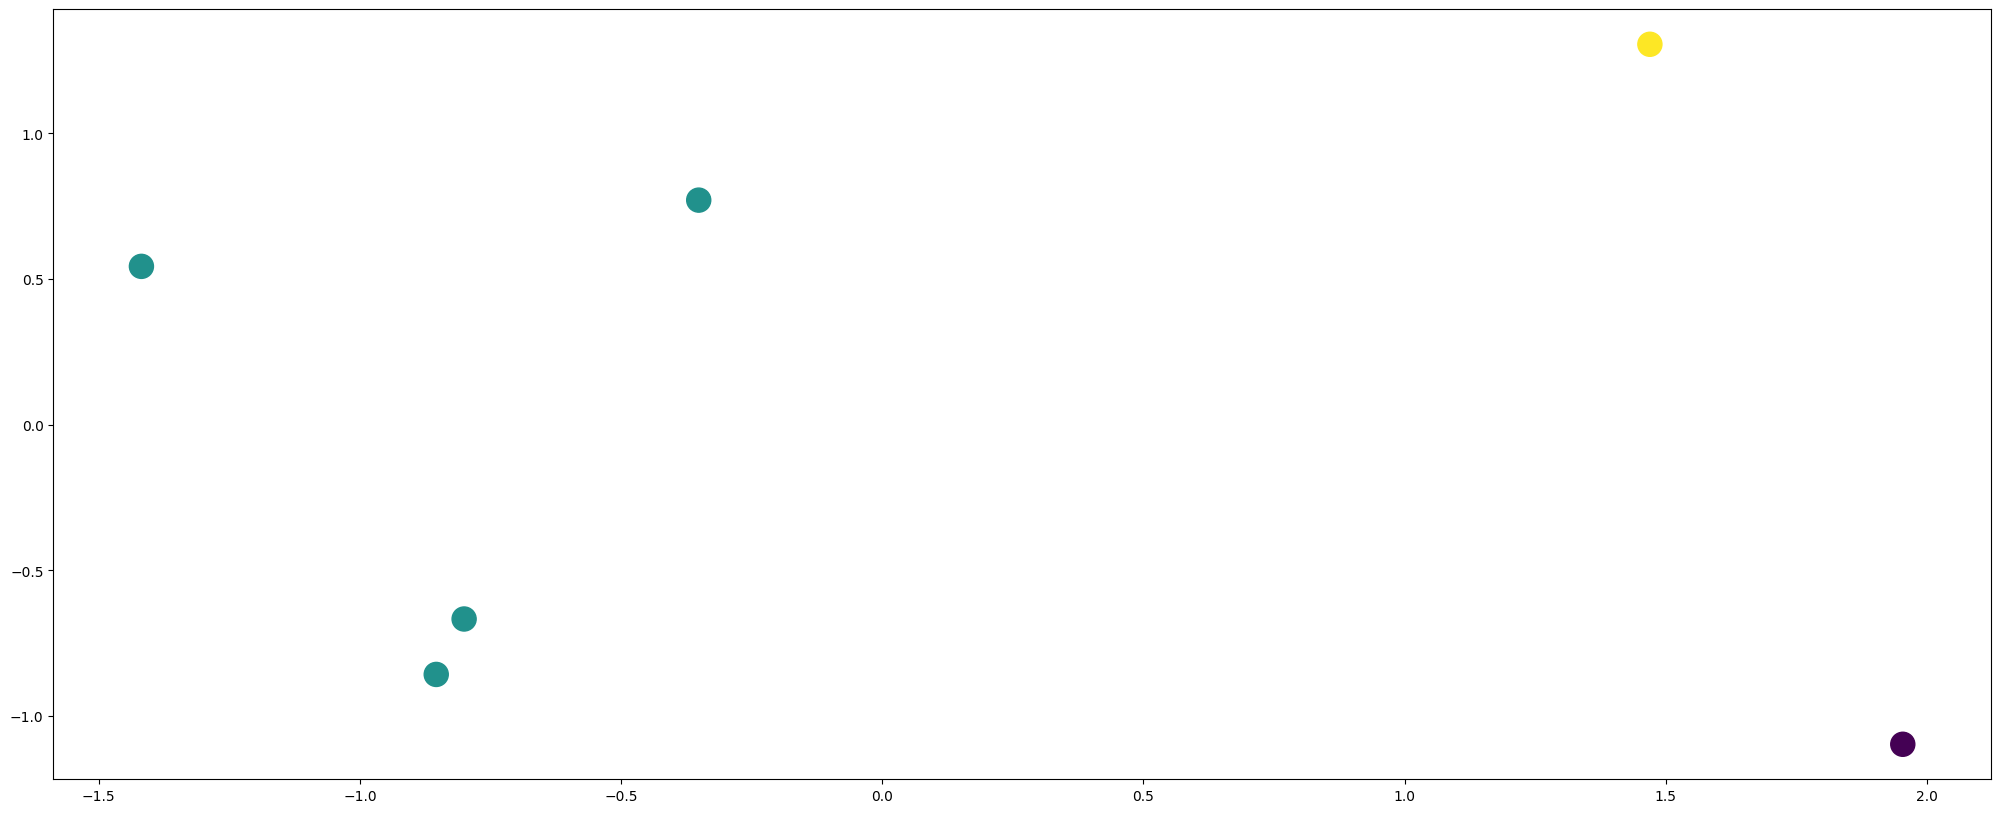

In [86]:
plt.figure(figsize=(25,10))
plt.scatter(mySeries_transformed[:, 0], mySeries_transformed[:, 1], c=labels, s=300)
plt.show()

And again thanks to the clever implementation of ```KMeans``` algorithm by ```sklearn``` team, labels are returned in the same order. Thus, we can use the same code to visualize our cluster in series.

Và một lần nữa nhờ vào việc triển khai thông minh thuật toán ```KMeans``` của nhóm ```sklearn```, các nhãn được trả về theo cùng một thứ tự. Do đó, chúng ta có thể sử dụng cùng một mã để trực quan hóa cụm của mình theo chuỗi.

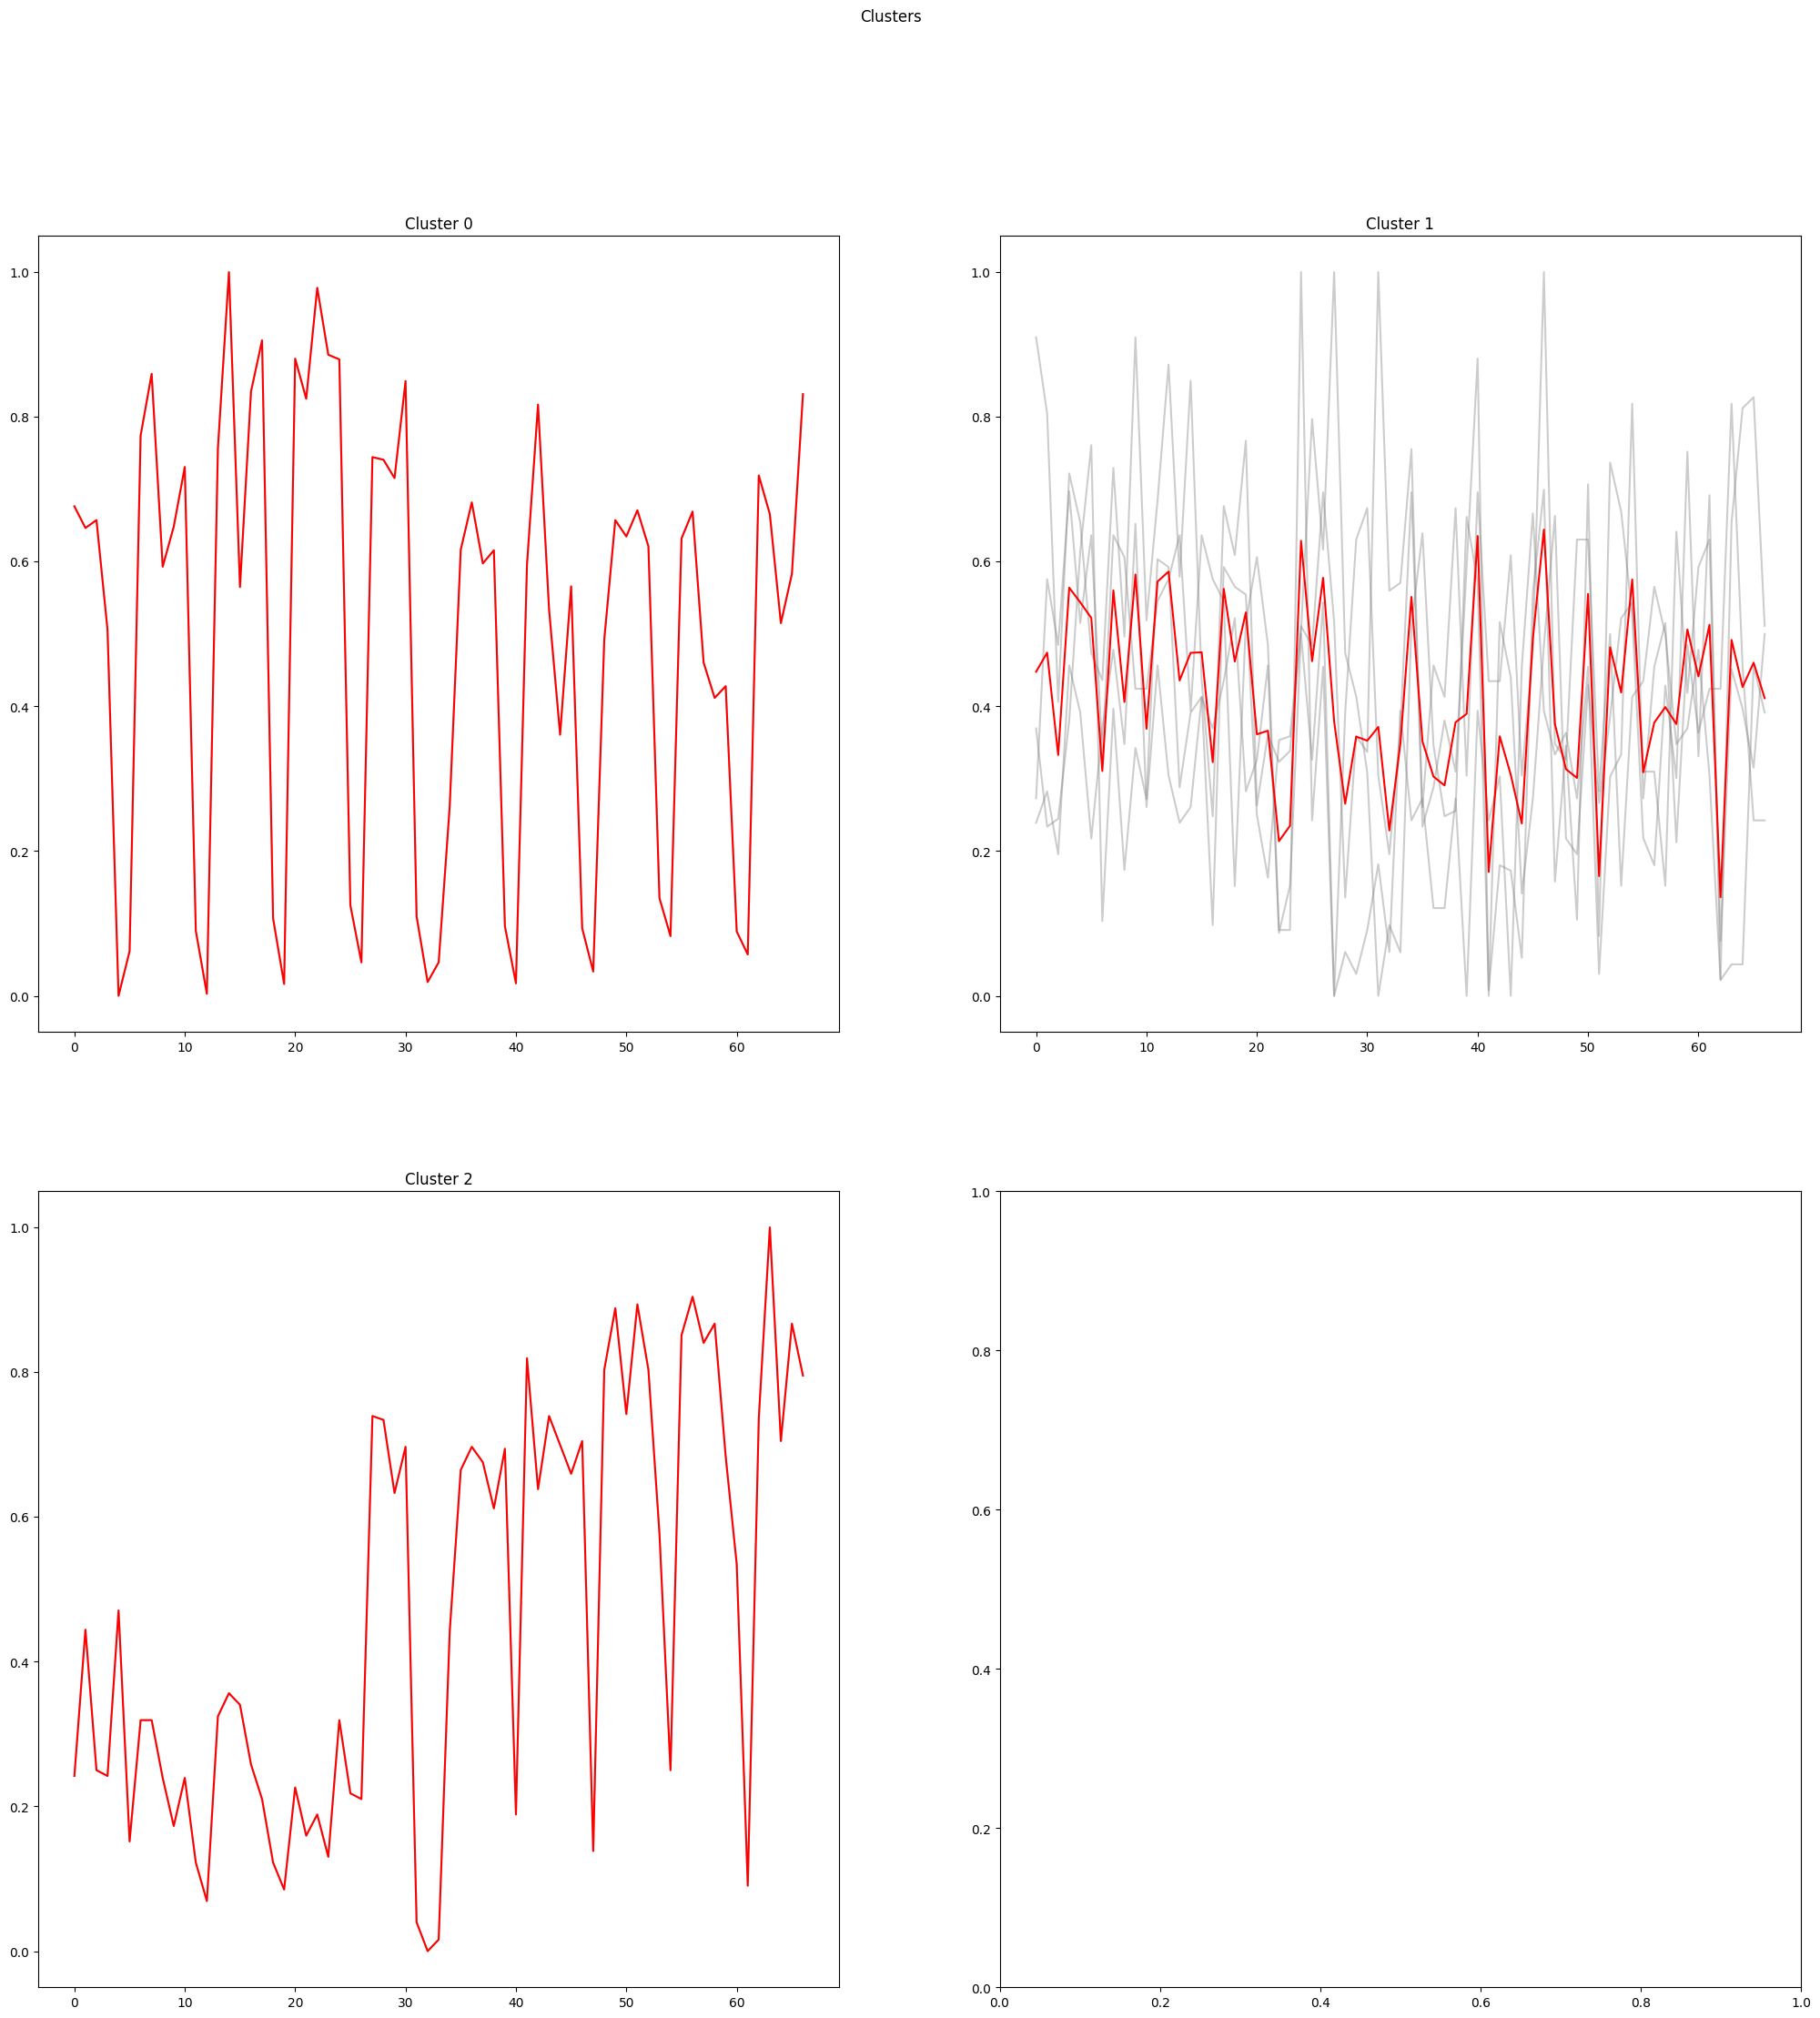

In [87]:
plot_count = math.ceil(math.sqrt(cluster_count))

fig, axs = plt.subplots(plot_count,plot_count,figsize=(25,25))
fig.suptitle('Clusters')
row_i=0
column_j=0
for label in set(labels):
    cluster = []
    for i in range(len(labels)):
            if(labels[i]==label):
                axs[row_i, column_j].plot(mySeries[i],c="gray",alpha=0.4)
                cluster.append(mySeries[i])
    if len(cluster) > 0:
        axs[row_i, column_j].plot(np.average(np.vstack(cluster),axis=0),c="red")
    axs[row_i, column_j].set_title("Cluster "+str(row_i*som_y+column_j))
    column_j+=1
    if column_j%plot_count == 0:
        row_i+=1
        column_j=0
        
plt.show()

And we can see that now with the ```PCA``` algorithm, our series are much more equally distributed to clusters than before.

Và chúng ta có thể thấy rằng hiện tại với thuật toán ```PCA```, chuỗi của chúng ta được phân bổ đều hơn vào các cụm so với trước đây.

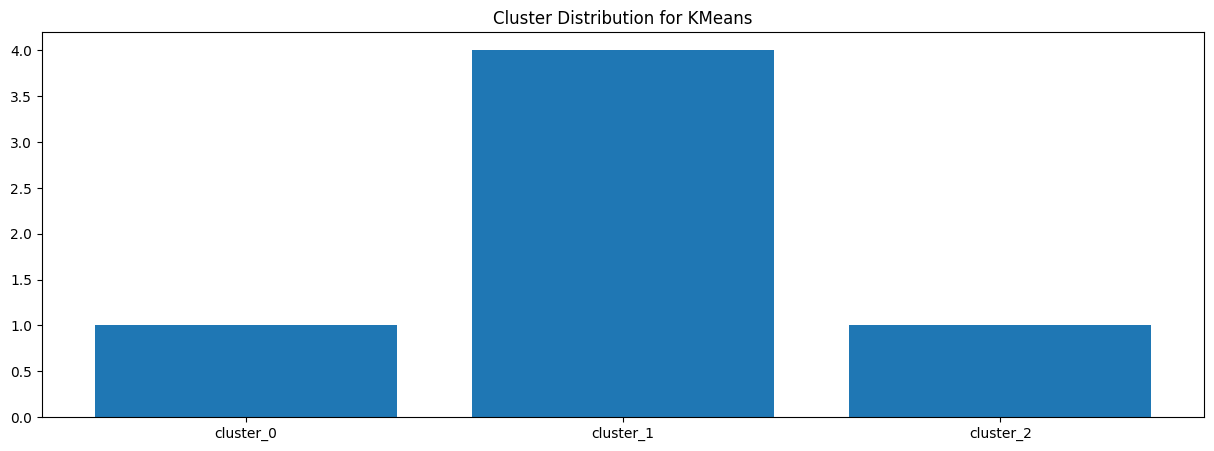

In [88]:
cluster_c = [len(labels[labels==i]) for i in range(cluster_count)]
cluster_n = ["cluster_"+str(i) for i in range(cluster_count)]
plt.figure(figsize=(15,5))
plt.title("Cluster Distribution for KMeans")
plt.bar(cluster_n,cluster_c)
plt.show()

In [89]:
fancy_names_for_labels = [f"Cluster {label}" for label in labels]
pd.DataFrame(zip(namesofMySeries,fancy_names_for_labels),columns=["Series","Cluster"]).sort_values(by="Cluster").set_index("Series")

,Cluster
Series,
aa_914,Cluster 0
aa_117,Cluster 1
aa_444,Cluster 1
aa_456,Cluster 1
aa_577,Cluster 1
aa_199,Cluster 2


# 3. Libraries

In here, you can easily reach the libraries that I used in this notebook.
- [Pandas](https://github.com/pandas-dev/pandas)
- [NumPy](https://github.com/numpy/numpy)
- [scikit-learn](https://github.com/scikit-learn/scikit-learn)
- [MiniSom](https://github.com/JustGlowing/minisom)
- [tslearn](https://github.com/tslearn-team/tslearn)
- [matplotlib](https://matplotlib.org/)

# 4. References

- Petitjean F., Ketterlin A., Gançarski P., A global averaging method for dynamic time warping, with applications to clustering, Pattern Recognition, 44(3), 678-693, 2011
- Kohonen T., Self-organized formation of topologically correct feature maps, Biological Cybernetics, 43, 59–69, 1982
- Bellman R., Kalaba R., On adaptive control processes, in IRE Transactions on Automatic Control, 4(2), 1-9, 1959

# 5. See Also

* [K-means Clustering: Algorithm, Applications, Evaluation Methods, and Drawbacks](https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a)
* [Self Organizing Maps](https://medium.com/@abhinavr8/self-organizing-maps-ff5853a118d4)
* <p style="color:red"><a href="https://towardsdatascience.com/the-curse-of-dimensionality-50dc6e49aa1e">The Curse of Dimensionality</a> <b>***</b></p>
* <p style="color:red"><a href="https://towardsdatascience.com/k-nearest-neighbors-and-the-curse-of-dimensionality-e39d10a6105d">k-Nearest Neighbors and the Curse of Dimensionality</a> <b>***</b></p>
* <p style="color:red"><a href="https://medium.com/@aptrishu/understanding-principle-component-analysis-e32be0253ef0">Understanding Principal Component Analysisy</a> <b>***</b></p>
* <p style="color:red"><a href="https://www.youtube.com/watch?v=FgakZw6K1QQ&ab_channel=StatQuestwithJoshStarmer">StatQuest: Principal Component Analysis (PCA), Step-by-Step</a> <b>*** (An awesome video by StatQuest)</b></p>

Hey, this is my first notebook and tutorial in Kaggle, so feel free to criticize and comment about, any error that you see, any idea of improvement for this notebook, or questions that you have.

Have a nice day!